### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let A and B be two matrices of size (n, k) and (k, m) respectively and C be the resultant nxm matrix obtained by matrix multiplication of A and B. $A_{ij}$, $B_{ij}$, $C_{ij}$ be the elements of the matrices A, B and C. By matrix multiplication, $C_{ij} = \sum_{t=1}^{k} A_{it} B_{tj}$

for each $C_{ij}$ we perform k multiplications, and for nxm elements in matrix C we perform (n)(m)(k) multiplications.

for each $C_{ij}$ we perform (k-1) additions, and for nxm elements in matrix C we perform (n)(m)(k-1) additions. 
 

### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [49]:
import numpy as np
import time
n, k, m = 1, 2, 5
A = np.random.rand(n, k).tolist()
B = np.random.rand(k, m).tolist()
# multiply matrices using list of lists
def matrix_multiply_list(A, B, n, k, m):
    start_time = time.time()
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    end_time = time.time()
    print(f"List of lists multiplication took {end_time - start_time} seconds")
    return C
# Function to multiply matrices using numpy
def matrix_multiply_numpy(A, B):
    start_time = time.time()
    A_np = np.array(A)
    B_np = np.array(B)
    C= np.dot(A, B)
    end_time = time.time()
    print(f"Numpy multiplication took {end_time - start_time} seconds")
    return C
print(matrix_multiply_list(A, B, n, k, m))
print("\n")
print(matrix_multiply_numpy(A, B))

List of lists multiplication took 0.0 seconds
[[0.9112679254486393, 0.6081938126651953, 1.1585633598774172, 0.2287778230642741, 0.43610532976179783]]


Numpy multiplication took 0.0 seconds
[[0.91126793 0.60819381 1.15856336 0.22877782 0.43610533]]


From the time taken by the above defined functions it is clear that the numpy is faster. Numpy is highly optimised library for numerical operations and uses optimised linear algebra libraries implemented in lower level languages like C and are more memory efficient than python lists. Numpy operations are also vectorised and arrays are performed in contiguous blocks of memory. 

### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the same method described at the beginning of the question, the time complexity of finding the median of an array of size n is $O(n^2)$ as it requires $n/2$ passes through the array. 
A better method can be using a sorting algorithm such as quicksort or mergesort to sort given array and then taking the middle element which will have $O(nlogn)$ time complexity.

In [3]:
import numpy as np
import time
def median_repeated_max(arr):
    n = len(arr)
    sorted_arr = []
    for _ in range(n):
        max_val = max(arr)
        sorted_arr.append(max_val)
        arr.remove(max_val)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2 
def partition(A, start, end):
    p_index = start
    pivot = A[end]
    for i in range(start, end):
        if A[i] <= pivot:
            A[i], A[p_index] = A[p_index], A[i]
            p_index += 1
    A[p_index], A[end] = A[end], A[p_index]
    return p_index
def quicksort(A, start, end):
    if start < end:
        p_index = partition(A, start, end)
        quicksort(A, start, p_index - 1)
        quicksort(A, p_index + 1, end)
    return A
def median_quicksort(arr):
    sorted_arr = quicksort(arr.copy(), 0, len(arr) - 1)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
arr = np.random.randint(0, 10000, size=10001)  # Random array with odd length
#M1
start_time = time.time()
median_repeated_max = median_repeated_max(arr.copy().tolist()) #TC=O(n^2)
time_repeated_max = time.time() - start_time
#M2
start_time = time.time()
median_quicksort = median_quicksort(arr)  #TC=O(nlogn)
time_quicksort = time.time() - start_time
#M3
start_time = time.time()
median_numpy = np.median(arr) 
time_numpy = time.time() - start_time
print(f"Median (Repeated max method): {median_repeated_max}, Time: {time_repeated_max:.6f} seconds")
print(f"Median (Quicksort method): {median_quicksort}, Time: {time_quicksort:.6f} seconds")
print(f"Median (Numpy method): {median_numpy}, Time: {time_numpy:.6f} seconds")

Median (Repeated max method): 5007, Time: 3.259084 seconds
Median (Quicksort method): 5007, Time: 0.137393 seconds
Median (Numpy method): 5007.0, Time: 0.001045 seconds


Finding the median using numpy is much faster than repeated passing through array method and also the quicksort algorithm which is considered to be the fastest sorting algo.

### 4. What is the gradient of the following function with respect to x and y? $$(x^2)y+(y^3)sin(x)$$

The gradient of a function f(x, y) is given by $\frac{\partial f}{\partial x}\hat{i} + \frac{\partial f}{\partial y}\hat{j}$

The gradient of a function f(x, y) with respect to x is $\frac{\partial f}{\partial x}$
$$f=(x^2)y+(y^3)sin(x)$$
$$\frac{\partial f}{\partial x} = y \frac{d(x^2)}{dx} + y^3 \frac{d \sin(x)}{dx}$$
  
$$\frac{\partial f}{\partial x} = 2xy+(y^3)cos(x)$$

The gradient of a function f(x, y) with respect to y is $\frac{\partial f}{\partial y}$
$$f=(x^2)y+(y^3)sin(x)$$
$$\frac{\partial f}{\partial y} = x^2 \frac{d y}{d y} + \sin(x) \frac{d (y^3)}{d y}$$

$$\frac{\partial f}{\partial y} = (x^2)+(3y^2)sin(x)$$

### 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [59]:
import jax.numpy as jnp
from jax import grad
def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)
grad_f_x = grad(f, argnums=0)  # Gradient with respect to x
grad_f_y = grad(f, argnums=1)  # Gradient with respect to y
test_values = [(1.0, 2.0), (0.5, -1.0), (-1.5, 0.0)]
for x, y in test_values:
    # Analytical gradients
    grad_x_analytical = 2 * x * y + (y**3) * jnp.cos(x)
    grad_y_analytical = x**2 + 3 * y**2 * jnp.sin(x)
    # JAX gradients
    grad_x_jax = grad_f_x(x, y)
    grad_y_jax = grad_f_y(x, y)
    print(f"\nFor x = {x}, y = {y}:")
    print(f"Analytical ∂f/∂x: {grad_x_analytical}, JAX ∂f/∂x: {grad_x_jax}")
    print(f"Analytical ∂f/∂y: {grad_y_analytical}, JAX ∂f/∂y: {grad_y_jax}")


For x = 1.0, y = 2.0:
Analytical ∂f/∂x: 8.322418212890625, JAX ∂f/∂x: 8.322418212890625
Analytical ∂f/∂y: 11.097651481628418, JAX ∂f/∂y: 11.097651481628418

For x = 0.5, y = -1.0:
Analytical ∂f/∂x: -1.8775825500488281, JAX ∂f/∂x: -1.8775825500488281
Analytical ∂f/∂y: 1.6882766485214233, JAX ∂f/∂y: 1.6882766485214233

For x = -1.5, y = 0.0:
Analytical ∂f/∂x: 0.0, JAX ∂f/∂x: 0.0
Analytical ∂f/∂y: 2.25, JAX ∂f/∂y: 2.25


### 6. Use sympy to confirm that you obtain the same gradient analytically.

In [61]:
x_s, y_s= sp.symbols('x y')
f_s = x_s**2 * y_s + y_s**3 * sp.sin(x_s)
grad_f_x_sym = sp.diff(f_s, x_s)
grad_f_y_sym = sp.diff(f_s, y_s)
print("\nAnalytical Gradient with SymPy:")
print(f"df/dx: {grad_f_x_sym}")
print(f"df/dy: {grad_f_y_sym}")
test_values = [(1.0, 2.0), (0.5, -1.0), (-1.5, 0.0)]
for x_val, y_val in test_values:
    grad_f_x_sym_val = grad_f_x_sym.evalf(subs={x_s: x_val, y_s: y_val})
    grad_f_y_sym_val = grad_f_y_sym.evalf(subs={x_s: x_val, y_s: y_val})
    print(f"\nFor x = {x_val}, y = {y_val}:")
    print(f"SymPy ∂f/∂x: {grad_f_x_sym_val}")
    print(f"SymPy ∂f/∂y: {grad_f_y_sym_val}")


Analytical Gradient with SymPy:
df/dx: 2*x*y + y**3*cos(x)
df/dy: x**2 + 3*y**2*sin(x)

For x = 1.0, y = 2.0:
SymPy ∂f/∂x: 8.32241844694512
SymPy ∂f/∂y: 11.0976518176948

For x = 0.5, y = -1.0:
SymPy ∂f/∂x: -1.87758256189037
SymPy ∂f/∂y: 1.68827661581261

For x = -1.5, y = 0.0:
SymPy ∂f/∂x: 0
SymPy ∂f/∂y: 2.25000000000000


### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$1. y=x$ 

$2. y=x^2 $

$3. y=\frac{x^3}{100} $

$4. y= sin(x) $

$5. y= \frac{sin(x)}{x} $

$6. y= log(x) $

$7. y= e^x $

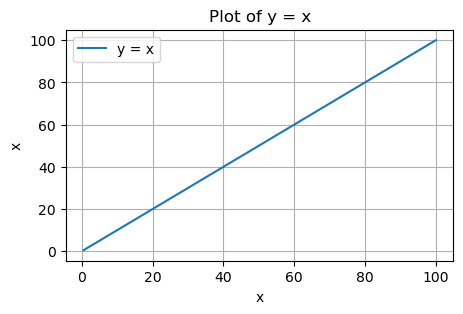

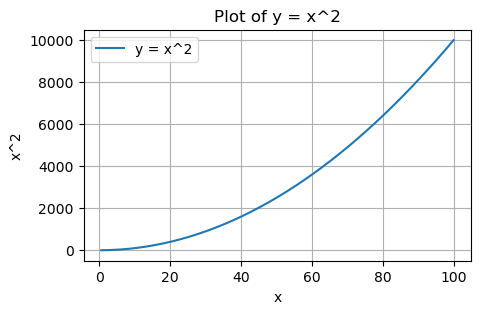

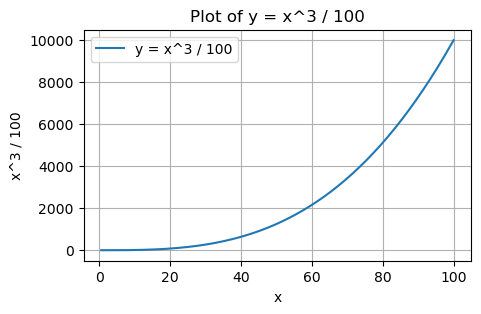

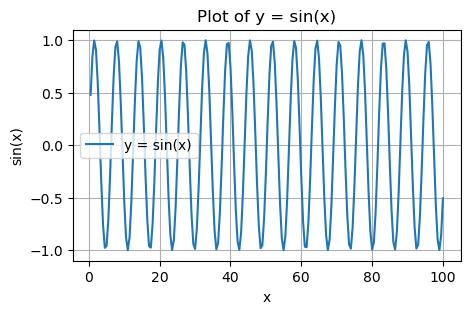

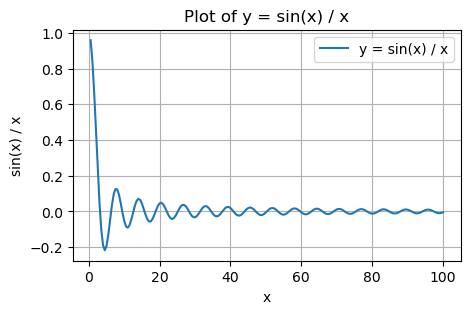

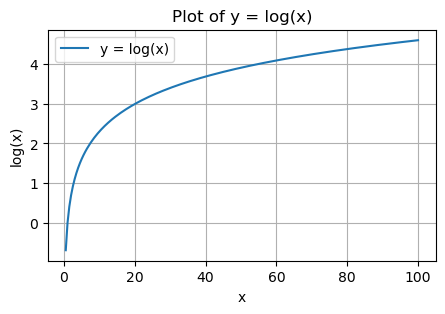

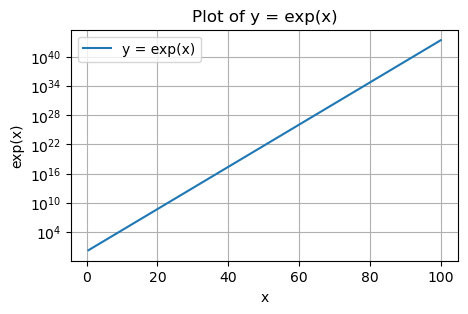

In [66]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.5, 100.5, 0.5)
y_=[(x, 'x', 'y = x'), (x**2, 'x^2', 'y = x^2'),((x**3) / 100, 'x^3 / 100', 'y = x^3 / 100'), (np.sin(x), 'sin(x)', 'y = sin(x)'), (np.sin(x) / x, 'sin(x) / x', 'y = sin(x) / x'), (np.log(x), 'log(x)', 'y = log(x)'),
    (np.exp(x), 'exp(x)', 'y = exp(x)')]
# func for plot
def plot(x, y, y_label, title):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, label=title)
    plt.title(f'Plot of {title}')
    plt.xlabel('x')
    plt.ylabel(y_label)
    if title == 'y = exp(x)':
        plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()
# Ploting each function
for y, y_label, title in y_:
    plot(x, y, y_label, title)

### 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [68]:
import numpy as np
import pandas as pd
matrix = np.random.uniform(1, 2, size=(20, 5)) # Generating a 20x5 matrix with random numbers uniformly drawn from the range [1, 2)
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"]) # DataFrame from the matrix with specified column names
std_devs = df.std()
row_means = df.mean(axis=1) # Calculate the mean of each row
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:")
print(f"Column: {std_devs.idxmax()}, Standard Deviation: {std_devs.max()}")
print("\nRow with the lowest mean:")
print(f"Row Index: {row_means.idxmin()}, Mean Value: {row_means.min()}")

DataFrame:
           a         b         c         d         e
0   1.820931  1.735355  1.847196  1.876501  1.899426
1   1.788699  1.995166  1.238288  1.553175  1.202149
2   1.530946  1.899720  1.493629  1.126725  1.686905
3   1.617259  1.606635  1.078113  1.614394  1.322074
4   1.428677  1.240986  1.776178  1.189483  1.683846
5   1.285947  1.625742  1.024640  1.542178  1.380573
6   1.124474  1.126637  1.327934  1.016028  1.478277
7   1.067186  1.477498  1.689038  1.982139  1.115994
8   1.987243  1.986325  1.565150  1.307997  1.080893
9   1.320939  1.349900  1.668216  1.871217  1.848552
10  1.879770  1.785774  1.493908  1.510456  1.026731
11  1.796182  1.211770  1.188613  1.012582  1.151662
12  1.722328  1.905717  1.413154  1.801899  1.334277
13  1.435534  1.249915  1.466002  1.084980  1.020872
14  1.134746  1.263636  1.550029  1.803236  1.149206
15  1.074587  1.904750  1.949573  1.216581  1.145150
16  1.319988  1.956143  1.822045  1.791539  1.569438
17  1.145706  1.205964  1.910709  1

### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [70]:
import numpy as np
import pandas as pd
matrix = np.random.uniform(1, 2, size=(20, 5))         # 20x5 matrix with random numbers uniformly drawn from the range [1, 2)
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"]) # DataFrame from the matrix with specified column names
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)    # New column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')          # New column 'g' with values 'LT8' if 'f' < 8 and 'GT8' otherwise
num_lt8_rows = (df['g'] == 'LT8').sum()                # Number of rows where the value in column 'g' is 'LT8'
std_f_lt8 = df[df['g'] == 'LT8']['f'].std()            # Standard deviation of column 'f' for rows where 'g' is 'LT8'
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()            # Standard deviation of column 'f' for rows where 'g' is 'GT8'  
print("DataFrame with new columns:")
print(df)
print("\nNumber of rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_f_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_f_gt8)

DataFrame with new columns:
           a         b         c         d         e         f    g
0   1.126061  1.552628  1.518194  1.456536  1.197501  6.850919  LT8
1   1.424161  1.501935  1.103775  1.215223  1.661809  6.906903  LT8
2   1.389099  1.902752  1.022949  1.894997  1.501332  7.711128  LT8
3   1.482363  1.314195  1.303737  1.838772  1.567429  7.506496  LT8
4   1.083052  1.093793  1.691391  1.668162  1.465157  7.001556  LT8
5   1.322197  1.530616  1.980012  1.247887  1.424959  7.505671  LT8
6   1.154397  1.661560  1.639476  1.056201  1.703715  7.215348  LT8
7   1.846246  1.086087  1.745370  1.615792  1.173173  7.466668  LT8
8   1.581576  1.872055  1.341086  1.421565  1.764045  7.980327  LT8
9   1.991123  1.706852  1.273816  1.602871  1.907376  8.482039  GT8
10  1.309169  1.113717  1.544350  1.570782  1.044425  6.582442  LT8
11  1.169504  1.986615  1.254460  1.783987  1.023194  7.217760  LT8
12  1.705327  1.373098  1.387360  1.071799  1.258803  6.796387  LT8
13  1.258796  1.3599

### 12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting allows operations between arrays of different shapes by automatically expanding the dimensions of the smaller array.
Because of this broadcasting in numpy the below result doesnot through an error and instead NumPy automatically broadcasts the matrix B across the columns of marix A.

In [73]:
import numpy as np
matrix_A = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])   # 2D array (matrix A) with shape (3, 4)
matrix_B = np.array([1, 2, 3, 4])      # 1D array (matrix B) with shape (4,)
result = matrix_A + matrix_B
print("Result of broadcasting:")
print(result)

Result of broadcasting:
[[ 2  4  6  8]
 [ 6  8 10 12]
 [10 12 14 16]]


### 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [75]:
import numpy as np
def compute_argmin(arr):
    min_index = 0
    for i in range(1, arr.size):
        if arr[i] < arr[min_index]:
            min_index = i
    return min_index  
arr = np.array([10, 2, 8, 5, 1])
print("Index of minimum element:", compute_argmin(arr))
if compute_argmin(arr)==np.argmin(arr):
    print("Both np.argmin function and defined compute_argmin function gives the same solution")

Index of minimum element: 4
Both np.argmin function and defined compute_argmin function gives the same solution
